# Python for Machine Learning

### *Session \#5*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. K-Nearest Neighbors

### Warm Ups

*Type the given code into the cell below*

---

In [70]:
%matplotlib inline
from matplotlib import pyplot as plt 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import ValidationCurve

import pandas as pd
import numpy as np

df = pd.read_csv("diamonds.csv")

**Define a function** `knn` **that takes two parameters: a dataframe** `data` **and a row** `diamond`

**Make the function add a** `distance` **column to** `data` **which is the difference between the** `carat` **column in each row and the** `carat` **column of** `diamond`

*Note: for simplicity, we are going to skip using `train_test_split` for this example*

In [76]:
def knn(data, diamond):
    data['distance'] = data['carat'] - diamond['carat']
    return data

**Change the** `distance` **column to be the squared difference instead, so that it's never negative. Now sort** `data` **according to** `distance` **using the** `sort_values()` **method.**

**Return the top five closest rows with** `.head()`

In [75]:
def knn(data, diamond):
    data['distance'] = (data['carat'] - diamond['carat'])**2
    data.sort_values('distance')
    return data.head()

**Change the function to return the mean of the** `carat` **values, instead of the rows themselves**

**Add a parameter** `k` **to your function which controls how many nearest neighbors you use.**

In [74]:
def knn(data, diamond, k):
    data['distance'] = (data['carat'] - diamond['carat'])**2
    data.sort_values('distance')
    neighbors = data.head(k)
    return neighbors['price'].mean()

**Change** `distance` **to be computed based on the** `table` **and** `depth` **columns as well**

In [80]:
def knn(data, diamond, k):
    carat_distance = (data['carat'] - diamond['carat'])**2
    table_distance = (data['table'] - diamond['table'])**2
    depth_distance = (data['depth'] - diamond['depth'])**2
    
    # Adding distances, adjusting for units on different scale 
    data['distance'] = carat_distance + table_distance/10000 + depth_distance/10000
    neighbors = data.sort_values('distance').head(k)
    return neighbors['price'].mean()

print(f"predicted: {knn(df, sample, 3)} actual: {sample.price}")

predicted: 351.3333333333333 actual: 326


**Create KNN Classifier**: `model = KNeighborsClassifier(n_neighbors=6)`

### Exercises
---

**1. Divide the dataset into a training set and test set, then train a KNeighborsClassifier on it.**

*Note: In this exercise the `label` column is what we are trying to predict*

In [ ]:
X = df['label']

**2. Set the random_state parameter on** `train_test_split` **and then use a validation curve to choose an optimal** `n_neighbors`

**3. Use the** `jupyter_drawing_pad` **widget to draw a digit**

*Hint: Draw slowly to get more data points*

In [ ]:
import jupyter_drawing_pad as jd
widget = jd.CustomBox()
widget.drawing_pad

**Run the following code, which convert the drawing into simple numerical form and plots it**

In [ ]:
def extract_data(widget):
    x_data = widget.drawing_pad.data[0]
    y_data = widget.drawing_pad.data[1]

    x_axis = np.linspace(min(x_data), max(x_data), 8)
    y_axis = np.linspace(min(y_data), max(y_data), 8)

    x_interval = x_axis[1] - x_axis[0]
    y_interval = y_axis[1] - y_axis[0]

    data = np.array(list(zip(x_data,y_data)), dtype=[('x', '<f8'), ('y', '<f8')])
    totals = np.zeros((8,8))

    for x_num, x in enumerate(x_axis):
        for y_num, y in enumerate(y_axis):
            count = len(data[(data['x'] > x) & (data['x'] < x + x_interval)&(data['y'] > y) & (data['y'] < y + y_interval) ])
            totals[x_num,y_num] = count*5 if count < 10 else 50
    return np.rot90(totals).reshape(1, -1)

num = extract_data(widget)
plt.imshow(num.reshape(8,8), cmap='Greys')

**Use** `model.predict()` **to see if the model got your digit right. If not, try using** `model.predict_proba()` **to see how close it was**

**Create KNN Classifier**: `model = KNeighborsClassifier(n_neighbors=6)`

In [84]:
model = KNeighborsClassifier(6)

### Exercises
---

**1. Divide the dataset into a training set and test set. Train and score the model.**

In [82]:
df = pd.read_csv("digits.csv")
X = df.drop('label', 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**2. Use a validation curve to choose an optimal** `n_neighbors`

Hint: Use this [example](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html) if you need a reminder of how to use a validation curve

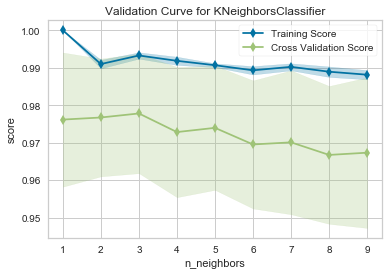

In [87]:
model = KNeighborsClassifier(n_neighbors=6)
viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=np.arange(1, 10), cv=10
)
viz.fit(X, y)
viz.finalize()

**3. Use the** `jupyter_drawing_pad` **widget to draw a digit**

*Hint: Draw slowly to get more data points*

In [ ]:
import jupyter_drawing_pad as jd
widget = jd.CustomBox()
widget.drawing_pad

**4. Run the following code, which convert the drawing into simple numerical form and plots it**


In [ ]:
def extract_data(widget):
    x_data = widget.drawing_pad.data[0]
    y_data = widget.drawing_pad.data[1]

    x_axis = np.linspace(min(x_data), max(x_data), 8)
    y_axis = np.linspace(min(y_data), max(y_data), 8)

    x_interval = x_axis[1] - x_axis[0]
    y_interval = y_axis[1] - y_axis[0]

    data = np.array(list(zip(x_data,y_data)), dtype=[('x', '<f8'), ('y', '<f8')])
    totals = np.zeros((8,8))

    for x_num, x in enumerate(x_axis):
        for y_num, y in enumerate(y_axis):
            count = len(data[(data['x'] > x) & (data['x'] < x + x_interval)&(data['y'] > y) & (data['y'] < y + y_interval) ])
            totals[x_num,y_num] = count*5 if count < 10 else 50
    return np.rot90(totals).reshape(1, -1)

num = extract_data(widget)
plt.imshow(num.reshape(8,8), cmap='Greys')

**5. Use** `model.predict()` **to see if the model got your digit right. If not, try using** `model.predict_proba()` **to see how close it was**

In [ ]:
model.predict(num)

## III. Decision Tree

### Warm Ups

*Type the given code into the cell below*

---
**Create a decision tree:** `model = DecisionTreeClassifier(max_depth=2)`

### Exercises
---

**1. Load the dataset and divide it into a training set and test set.**

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**2. Create a pipeline with** `OneHotEncoder` **and a** `DecisionTreeClassifier`

In [ ]:
model = make_pipeline(OneHotEncoder(), DecisionTreeClassifier(max_depth=2))

**3. Set the random_state parameter on** `train_test_split` **and adjust the max_depth parameter to optimize the model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = make_pipeline(OneHotEncoder(), DecisionTreeClassifier(max_depth=6))
model.fit(X_train, y_train)
model.score(X_test, y_test)

**4. Decision trees will typically not perform well with imbalanced data. Check the class balance with a ClassBalance visualization, and add a RandomSampler to your pipeline if necessary**

In [ ]:
viz = ClassBalance()
viz.fit(y)

model = make_pipeline(OneHotEncoder(), RandomOverSampler(), DecisionTreeClassifier(max_depth=6))

## III. Random Forest

### Warm Ups

*Type the given code into the cell below*

---

**Create a random forest**: `model = RandomForestClassifier(n_estimators=100)`

### Exercises
---

**1. Divide the dataset into a training set and test set.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**2. Create a pipeline with a OneHotEncoder and a RandomForestClassifier**

In [ ]:
model = make_pipeline(OneHotEncoder(), RandomForestClassifier())

**3. Set the random_state parameter on** `train_test_split` **and adjust the n_estimators parameter to optimize the model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = make_pipeline(OneHotEncoder(), RandomForestClassifier(n_estimators=250))
model.fit(X_train, y_train)
model.score(X_test, y_test)